<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/3.Transfer-functions/Fun%C3%A7%C3%A3o_de_transfer%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>

# Funções de transferência

## Instalando e importando as bibliotecas

In [1]:
! pip install -qq control sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [3]:
# Ajustando o tamanho da fonte de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 25px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

# Criando diretamente uma função de transferência

In [7]:
# Sistemas de primeira ordem
G1 = ct.tf([5],[2,1])
G2 = ct.tf([2],[1,1])
G1

TransferFunction(array([5]), array([2, 1]))

In [44]:
# Sistemas de segunda ordem
s = ct.tf('s')
G3 = 15/(1.5*s**2 + 0.4*s + 3)
G4 = 15/(1.5*s**2 + 6*s + 3)
G3

TransferFunction(array([15]), array([1.5, 0.4, 3. ]))

In [45]:
# Obter dos sistemas
G = [G1, G2, G3, G4]
for g in G:
  print(g.pole())

[-0.5+0.j]
[-1.+0.j]
[-0.13333333+1.40791414j -0.13333333-1.40791414j]
[-3.41421356+0.j -0.58578644+0.j]


(array([-0.28036904+0.60712997j, -0.28036904-0.60712997j,
         0.28036904+0.60712997j,  0.28036904-0.60712997j]),
 array([-0.41666667+0.39965263j, -0.41666667-0.39965263j,
         0.        +0.j        ]))

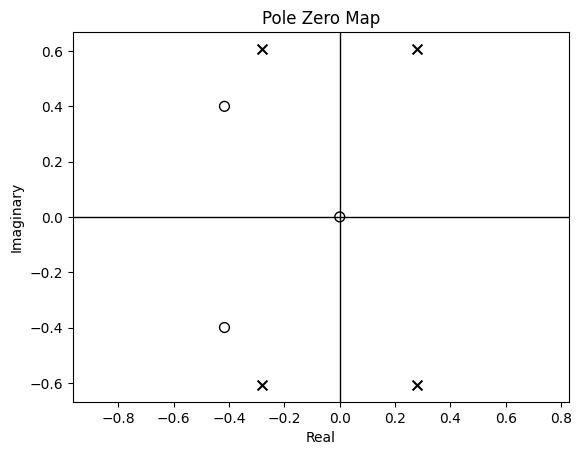

In [26]:
G5 = (3*s**3 + 2.5*s**2 + s)/(5*s**4 + 2.9*s**2 + 1)
ct.pzmap(G5);

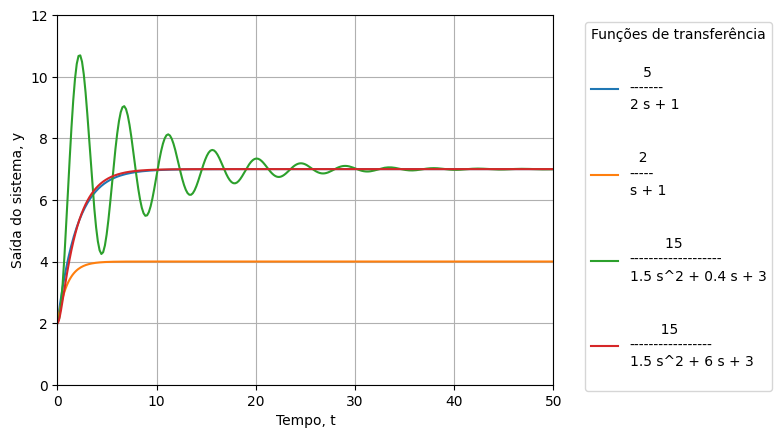

In [72]:
# Resposta ao degrau (step)
delta = 1
y0 = 2
for g in G:
  t, y = ct.step_response(g, T=50)
  plt.plot(t, y0 + delta*y, label = g)
plt.xlabel('Tempo, t')
plt.ylabel('Saída do sistema, y')
plt.legend(title="Funções de transferência", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis([0, 50, 0, 12])
plt.grid()

In [62]:
# Simulação interativa
from ipywidgets import interact, widgets

def simula_2ordem(tau, fator_xi):
  K = 1.
  xi = fator_xi
  G = ct.tf(K,[tau**2, 2*xi*tau, 1])
  t, y = ct.step_response(G)
  plt.plot(t,y)
  plt.grid()
  plt.xlabel('Tempo, t')
  plt.ylabel('Saída do sistema, y')
  plt.show()

interact(simula_2ordem,
         tau = widgets.FloatSlider(min=0.01, max=5, step=0.01, value=1.0),
         fator_xi = widgets.FloatSlider(min=0, max=1.5, step=0.01, value=1.0));


interactive(children=(FloatSlider(value=1.0, description='tau', max=5.0, min=0.01, step=0.01), FloatSlider(val…

# Convertendo um espaço de estados em uma função de transferência

In [50]:
from sympy import symbols, Poly, eye

def ABCD_to_tf(A,B,C,D):
    '''  É utilizada para manipulação simbólica e algébrica para converter um espaço
    de estados dado por (A, B, C, D) para uma matriz de funções de  transferência
    no domínio de Laplace.'''
    s = symbols('s')
    n = A.shape[0]
    G = C*(s*eye(n) - A).inv()*B + D
    return G.as_immutable()

def get_tf(g_exp):
    '''Extrai os coeficiente do numerador e do denominador de uma função de transferência
    simbólica e converte para um função de transferências numérica, a qual pode ser usada
    para extrair propriedades dos sistema.'''
    num, den = g_exp.as_numer_denom()
    num_float = [float(i) for i in Poly(num).all_coeffs()]
    den_float = [float(i) for i in Poly(den).all_coeffs()]
    den_ = den_float[-1]
    return ct.tf(np.array(num_float)/den_,
                 np.array(den_float)/den_)


In [51]:
# Especificar o modelo em espaço de estados (exemplo)
A = np.array([[-1.14 , -0.01 ],
              [29.332, -0.947]])
B = np.array([[0.001, 1.   , 0.   ],
              [0.255, 0.   , 2.092]])
C = np.array([[1., 0.],
              [0., 1.]])
D = np.array([[0., 0., 0.],
              [0., 0., 0.]])

sys = ct.ss(A,B,C,D)

sys

<LinearIOSystem:sys[329]:['u[0]', 'u[1]', 'u[2]']->['y[0]', 'y[1]']>

In [ ]:
G = ABCD_to_tf(A,B,C,D) # fornece a matriz de funções de transferência
G.simplify()

Matrix([
[(0.029332*s - 0.047019196)/(29.332*s**2 + 61.215884*s + 40.2699028), (29.332*s + 27.777404)/(29.332*s**2 + 61.215884*s + 40.2699028), -0.61362544/(29.332*s**2 + 61.215884*s + 40.2699028)],
[                 (0.255*s + 0.320032)/(1.0*s**2 + 2.087*s + 1.3729),                            29.332/(1.0*s**2 + 2.087*s + 1.3729),    (2.092*s + 2.38488)/(1.0*s**2 + 2.087*s + 1.3729)]])

In [ ]:
Gp = get_tf(G[0,1])
Gp

TransferFunction(array([0.72838517, 0.68978076]), array([0.72838517, 1.52013985, 1.        ]))

In [ ]:
Gp.dcgain()

0.6897807560638066

In [ ]:
Gp.poles()

array([-1.0435+0.53292378j, -1.0435-0.53292378j])

In [ ]:
Gp.zeros()

array([-0.947+0.j])

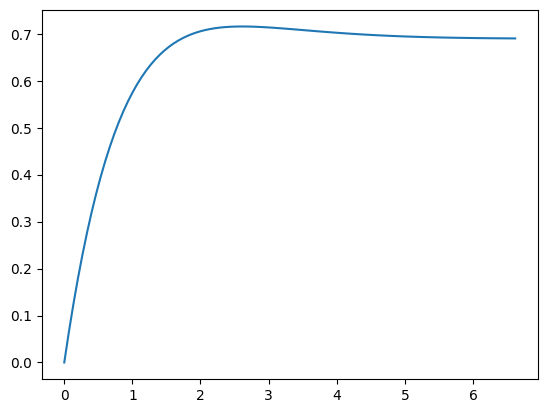

In [ ]:
t, y = ct.step_response(Gp)
plt.plot(t,y);